In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [84]:
A1,A2,A3 = 60 * torch.rand(3,10)

In [85]:
A4 = torch.max(A1,A2)

In [89]:
t0 = 96
x = torch.arange(1,t0+24).type(torch.float)

In [123]:
fx = torch.cat([A1.unsqueeze(1)*torch.sin(np.pi*x[0:12]/6)+72 , A2.unsqueeze(1)*torch.sin(np.pi*x[12:24]/6)+72 , A3.unsqueeze(1)*torch.sin(np.pi*x[24:t0]/6)+72 , A4.unsqueeze(1)*torch.sin(np.pi*x[t0:t0+24]/12)+72],1)

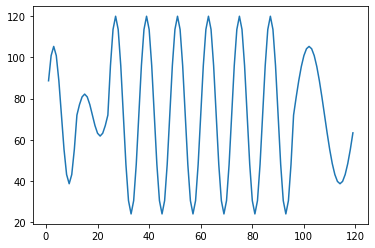

In [174]:
plt.plot(x.numpy(),fx[3,:].numpy())
plt.show()

In [146]:
def chunk_time_series(t0,window_size,y):
    window_size = t0+1
    y_chunked = []
    y_left = []
    for t in range(0,fx.shape[1]-window_size):
        y_chunked.append(y[:,t:t+window_size])
        y_left.append(y[:,t+window_size])
    return torch.cat(y_chunked,0),torch.cat(y_left)

In [83]:
from torch.utils.data import Dataset

In [169]:
class time_series(Dataset):
    """synthetic time series dataset from section 5.1"""
    
    def __init__(self,t0=96,window_size=96,N=4500,transform=None):
        """
        Args:
            t0: previous t0 data points to predict from
            window_size: how many points to use for inference of next time point
            N: number of data points
            transform: any transformations to be applied to time series
        """
        self.t0 = t0
        self.window_size = window_size
        self.N = 4500
        self.transform = None
        
        A1,A2,A3 = 60 * torch.rand(3,10)
        A4 = torch.max(A1,A2)

        x = torch.arange(1,t0+24).type(torch.float).unsqueeze(0)
        
        fx = torch.cat([A1.unsqueeze(1)*torch.sin(np.pi*x[0,0:12]/6)+72 ,
                        A2.unsqueeze(1)*torch.sin(np.pi*x[0,12:24]/6)+72 ,
                        A3.unsqueeze(1)*torch.sin(np.pi*x[0,24:t0]/6)+72 ,
                        A4.unsqueeze(1)*torch.sin(np.pi*x[0,t0:t0+24]/12)+72],1)
        
        self.x,self.x_next = chunk_time_series(t0,window_size,x)
        self.fx,self.fx_next = chunk_time_series(t0,window_size,fx)
        
        
    def __len__(self):
        return len(self.fx)
    
    def __getitem__(self,idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        sample = {"x":self.x[idx,:],"x_next":self.x_next[idx],"fx":self.fx[idx,:],"fx_next":self.fx_next[idx]}
        
        
        if self.transform:
            sample=self.transform(sample)
            
        return sample

In [170]:
dataset = time_series(t0,window_size,100)

In [177]:
dataset[0:2]

{'x': tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
          15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
          29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
          43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
          57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.,
          71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82., 83., 84.,
          85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95., 96., 97.],
         [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
          16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
          30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
          44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57.,
          58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70., 71.,
          72., 73., 74., 75., 76., 77.,